# Karaoke Party At Home!!
## PIC 16B Final Project 
### By Isabella Woulfe, Anika Misra, and Athena Mo

Our project aims to address the problem of not finding clean karaoke background tracks
with simply chords for songs by Top Ten Artists. Oftentimes, people want clean instrumental versions of songs that do not
have additional background vocals, additional instruments, or have required ads that you need
to watch before getting access to the karaoke backtrack. Oftentimes, musicians want to layer on
their own instruments and their own vocals, and quickly need the chord sounds for the song—nothing else.

In general our project was divided into three main segments: gathering data using webscraping, creating music, and displaying on a a web app. Through this we successfully completed the following components:
- Web scraping 
- Working with large and messy data 
- Building a dynamic website 
- Using packages not introduced in PIC 16A or PIC 16B

In this blog post, we will demonstrate how to use our project tools. We will begin by showing you how to run the website on your local device. Then, our next three sections will explain how to build the main components of our website: 
1. Webscraper 
2. Music processer 
3. Webapp 

In this blog, we will explain how we built our project from scratch. By following along with this tutorial, you will learn the function behind each piece of the website, so that you can also customize your own Chordy website by changing the music processer, modifying the webscraper, or playing around with the format of the Webapp. 

Let's get started by first running the existing website on your local device. 


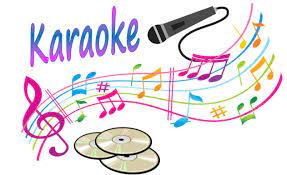

## Part 0: Setup and how to run website on your local device 

First, we will explain how to run the website on your local device. Note that more detailed instructions on how to run the website are located in the README file for our repisitory: https://github.com/anikamisra/PIC16B-project/blob/main/README.md

1. First, clone the github repository into your local device created for this project, located here: 
https://github.com/anikamisra/PIC16B-project . Here is a tutorial on how to clone a git repo: https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository

2. Next, make sure to pip install all the required packages. These include: **flask, flask_cors, dotenv, midiutil, mingus, pandas, pychord, selenium, scrapy, pymongo**, and any other non-updated packages, depending on your environment. 

2. Once you are in the PIC16B-project folder on your local device, add a ".env" file with the DB password. Here is where you can find the password needed: 
https://github.com/anikamisra/PIC16B-project/blob/main/README.md 

3. Navigate to the "chord_scraper" folder on your local device. Ensure that "app.py" exists in this folder. Then, run this line in your terminal: 

And you should see something like this in your terminal: 

By pasting "http://127.0.0.1:5000" into your favorite browser, you can access Chordy and download backtracks to any top 100 song of your choice! 

Also, note that all of the functions in our project are contained in the **"chordy_functions_package" module**. So, if you want to edit any of these functions, you can easily import this module into your code and edit from there.  

Now that we have explained how to run the website on your local device, let us dive in to how we actually created this project.

## Part 1: Our Webscraper

Before we can start creating music, we need to gather the music data. We did this through webscraping. After researching, we decided to gather data from Chordify.net. Chordify is a platform that provides chords for thousands of songs, compatible with guitar, ukelele, piano, and more. From Chordify, we collected the chords of about 100 songs from the top artists in the US. We also gathered the bar lengths of each song, as well as the song titles. We stored our final data in a separate csv file for each artist, which provides for easier navigation in regards to the Webapp. 

Our scraper has two parts: 
1. Parse the artist page and yield a song url 
2. Parse song page and yield song chords in the form of a dictionary 

To implement our scraper, we used both Scrapy and Selenium. We learned how to use Scrapy in Homework 2, but adding Selenium allowed us more flexibility with the dynamic website style of Chordify.  

Also note that though our scraper only takes in one input however, it is possible to modify the scraper to accept a list of urls as opposed to a single artist url, and then scrape from there. 

Finally, when scraping, make sure to obey the Robot.txt for every website. In this code, the default is set to "off", but make sure to turn it back to "on" when you run the scraper. This setting is located in the "settings.py" file of the chord scraper. 

Here is how we built our scraper. First, we made sure to import all the necessary packages. 

In [15]:
import scrapy 
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.chrome.options import Options as ChromeOptions
from scrapy.selector import Selector
from scrapy.http import Request
import time   
import inspect

Now, let's take a look at the actual scraper itself. 

In [24]:
from chordy_functions_package import chord_spider
print(inspect.getsource(chord_spider.chord_scraper))

class chord_scraper(scrapy.Spider): 
    name = 'chord_scraper'
    
    def __init__(self, artistname, *args, **kwargs):
        """
        Initializer for chord_scraper. Inherits from scrapy.Spider class
        """ 
        super().__init__(*args, **kwargs)  
        # format artist name properly 
        artistname_formatted = ("-".join(artistname.split())).lower()
        
        # form url of artist page 
        artist_page_url = "https://chordify.net/chords/"+artistname_formatted+"-songs"
        self.start_urls = [artist_page_url]
        
        # firefox option: 
        #options = Options()
        #options.headless = True
        #firefox_profile = webdriver.FirefoxProfile()
        #firefox_profile.set_preference("browser.privatebrowsing.autostart", True)
        #self.driver = webdriver.Firefox(options=options)
        
        # chrome option 
        options = ChromeOptions()
        options.add_argument("--incognito")
        options.add_argument("--headless")

   

As we can see, there are four functions defined in the web scraper. 

1. **Initializer**: This function initializes the webscraper. It takes in the terminal input and builds the url for the artist page. It also sets up the options for our scraper. Note that in our scraper, we used Chrome, but Firefox options are commented out for your convenience, too. The terminal input is the artist page formatted in Chordify.net format. For example, on Dua Lipa's page, the url is: https://chordify.net/chords/dua-lipa-songs Hence, the input for this page would be "dua-lipa". The initializer then forms the rest of the URL through simple hardcoding, since the format for each artist page is the same, and calls the first parse function. 
2. **Parse**: This function starts on the artist page and parses through the songs of each artist. First, it waits for the page to load fully. Then, it collects the url of eachs song and passes the result to the parse_song_url function. 
3. **parse_song_url**: This function starts on a single song page. It also waits for the page to load. It also obtains the song name by string slicing and cleaning of the song url, since the song url contains the song name. Then, it colleccts the chords for the song. It creates a dictionary value with the **key** as the bar number, and the value is a **tuple** containing the chord for that bar number, and bar length as the second argument. 
3. **close**: This function closes the webdriver that we set up for the scraper and ends the Webdriver session. 

Output: key: bar_number, value: (chord, bar_length) 

Once the chords have been yielded in the dictionary format, a csv file is created for that artist. For example, here is what the csv file looks like for Taylor Swift's page: 

In [23]:
filename = "taylorswift.csv"
df = pd.read_csv(filename)
df.head()

,song_name,song_url,song_chords
0,Look What You Made Me Do 2,https://chordify.net/chords/taylor-swift-songs...,"{'0': ('N', '4'), '1': ('N', '4'), '2': ('N', ..."
1,Opening,https://chordify.net/chords/taylor-swift-songs...,"{'0': ('N', '4'), '1': ('N', '4'), '2': ('N', ..."
2,I Knew You Were Trouble 2,https://chordify.net/chords/taylor-swift-songs...,"{'0': ('N', '4'), '1': ('N', '4'), '2': ('N', ..."
3,Willow,https://chordify.net/chords/taylor-swift-songs...,"{'0': ('N', '4'), '1': ('E:min', '4'), '2': ('..."
4,August,https://chordify.net/chords/taylor-swift-songs...,"{'0': ('N', '4'), '1': ('N', '4'), '2': ('N', ..."


But what do we put in the terminal? First, make sure you have cloned the github repisitory. Then, navigate to the chord_scraper folder that contains "spiders". After running 

In your terminal, if you see "settings.py" in the output, you are in the right folder. Then, if you want to scrape the top 10 artists' pages, you would run the following lines in your terminal. 

- scrapy crawl chord_scraper -o results.csv -a artistname=dua-lipa
- scrapy crawl chord_scraper -o taylorswift.csv -a artistname=taylor-swift
- scrapy crawl chord_scraper -o badbunny.csv -a artistname=bad-bunny
- scrapy crawl chord_scraper -o theweeknd.csv -a artistname=the-weeknd
- scrapy crawl chord_scraper -o drake.csv -a artistname=drake
- scrapy crawl chord_scraper -o travisscott.csv -a artistname=travi-scott
- scrapy crawl chord_scraper -o beyonce.csv -a artistname=beyonce
- scrapy crawl chord_scraper -o michaeljackson.csv -a artistname=michael-jackson
- scrapy crawl chord_scraper -o ladygaga.csv -a artistname=lady-gaga
- scrapy crawl chord_scraper -o arianagrande.csv -a artistname=ariana-grande

More ideas: In the future, you can play around with what we have built. For example, you can scrape **other artists** besides just the top 10. In the "artistname" argument in the terminal, just make sure to input the properly formatted name of the artist you would like to see. 
Furthermore, for faster scraping, you can also edit the initializer of the webscraper to take in a **list of urls** as opposed to just a single url at a time. However, we did not find this necessary as we were only scraping 10 artists. 

Now that we have successfully created our csv files, we can extract this data and use it in our next step to create some great tracks!

## Part 2: Music Generating Function

For our project, we really wanted to look outside the scope of this course and try something completely new. Our goal with this project was to create actual music in the form of audio files that users could listen and sing along to. In order to achieve this goal, we had to research other Python packages. Thanks to several different websites, most notably an article on Medium.com by Steve Hiehn: https://medium.com/@stevehiehn/how-to-generate-music-with-python-the-basics-62e8ea9b99a5, we were able to create the function to generate music. 

The first package we used was **MIDIUtil**. This specific allowed us to create an audiofile using the notes and chords we obtained in our data set. The next two packages we used helped our system understand different music terms and what they mean. These two functions are called **mingus.core** and **pychord**. These packages allow us to use note and chord names in our code and they will relate to the correct idea in music. We also continued to use Pandas to extract different elements within our dataset. 

In [30]:
#importing all of the necessary packages
from midiutil import MIDIFile
from mingus.core import chords
import ast
import pandas as pd
from pychord import Chord

After downloading the necessary packages and ensuring we had the necessary data, we needed clean and reorganize our chord data. At this time, all of our chords were organized in different dictionaries. Using Pandas, we were able to pull out the chord names (in the form of strings) and organize them into a list. We then organized our elements of the list so they were in a form that Mingus.core and Pychord would recognize. Once we had all of the chords, we used our packages to create a list of the corresponding notes. 

Next, we developed a function, thanks to Steve Hiehn's guidance, that creates an audio file out of the list of notes with a given tempo and volume. Please see the code below. The function was able to identify the sound/octave that corresponds to each string containing the name of a note. Additionally, we need to account for notes that have varying names in order to prevent any errors. We did this by writing a short function that contained several "if" loops which would change the note names. At the end of the code cell, there are a few more set values that may cary in between songs that allow for changes to the tempo, volume, and more. 

In [39]:
from chordy_functions_package import app
print(inspect.getsource(app.musicpackage))

def musicpackage():
    """
    Main function for processing music data.
    Reads chords data from a CSV file, converts chords to notes,
    and generates a MIDI file based on the chord progression.
    """

    NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
    OCTAVES = list(range(11))
    NOTES_IN_OCTAVE = len(NOTES)

    errors = {
        'There was an error.'
    }
    def read_csvpath_from_file():
        """
        Reads from the config.txt file.
        Returns the content of line named "cs_path"
        """
        with open('config.txt', 'r') as file:
            for line in file:
                if line.startswith('csv_path'):
                    variable_value = line.split('=')[1].strip().strip('"')
                    return variable_value
        return None

    def read_index_from_file():
        """
         Reads from the config.txt file.
         Returns the content of line named "user_song"
         """
        with open('config.txt', '

Finally, used the MIDIUtil package to create our audio file based on the list of notes and octaves that follows the given interger values for track, tempo, and time. For users on a Mac system, the output file will download to their device in the form of a mid file that can be played in the app "Garage Band". For Windows system users, the output file will download into the file app of the device and can be played directly from there as a mid file. You can see this last part in the last lines of the musicpackage() function above. 

This series of functions required each of us to gather a basic understanding of music theory and different files types in addition to the appilcations of Python methods we learned in class. Even though there was a lot of new content that we needed to learn on our own, we still were able to gather great experience with data cleaning. We implemented our understanding of Pandas and pulled data directly from our data frame. We worked to change string names and used a lot of trial and error to identify which formats worked best for the packages we were using to make the music. Additionally, we reorganized our data so that we could take elements of the dictionary we received from our scraper and turn it into a list with only the necessary strings. Although this process took a lot of different approaches and constant changes, we successfully created audio files that match some of our favorite hit songs.   

For example, here is what the original CSV notes for "Don't start now" by Dua Lipa looked like before we ran our music package: 

In [6]:
import pandas as pd
df = pd.read_csv("dualipa.csv")
row1 = df.iloc[1]
print(row1)

song_name                                                Houdini
song_url       https://chordify.net/chords/dua-lipa-songs/hou...
song_chords    {'0': ('N', '4'), '1': ('N', '4'), '2': ('N', ...
Name: 1, dtype: object


And here is what that same song looks like translated as an audio file into Garageband: 

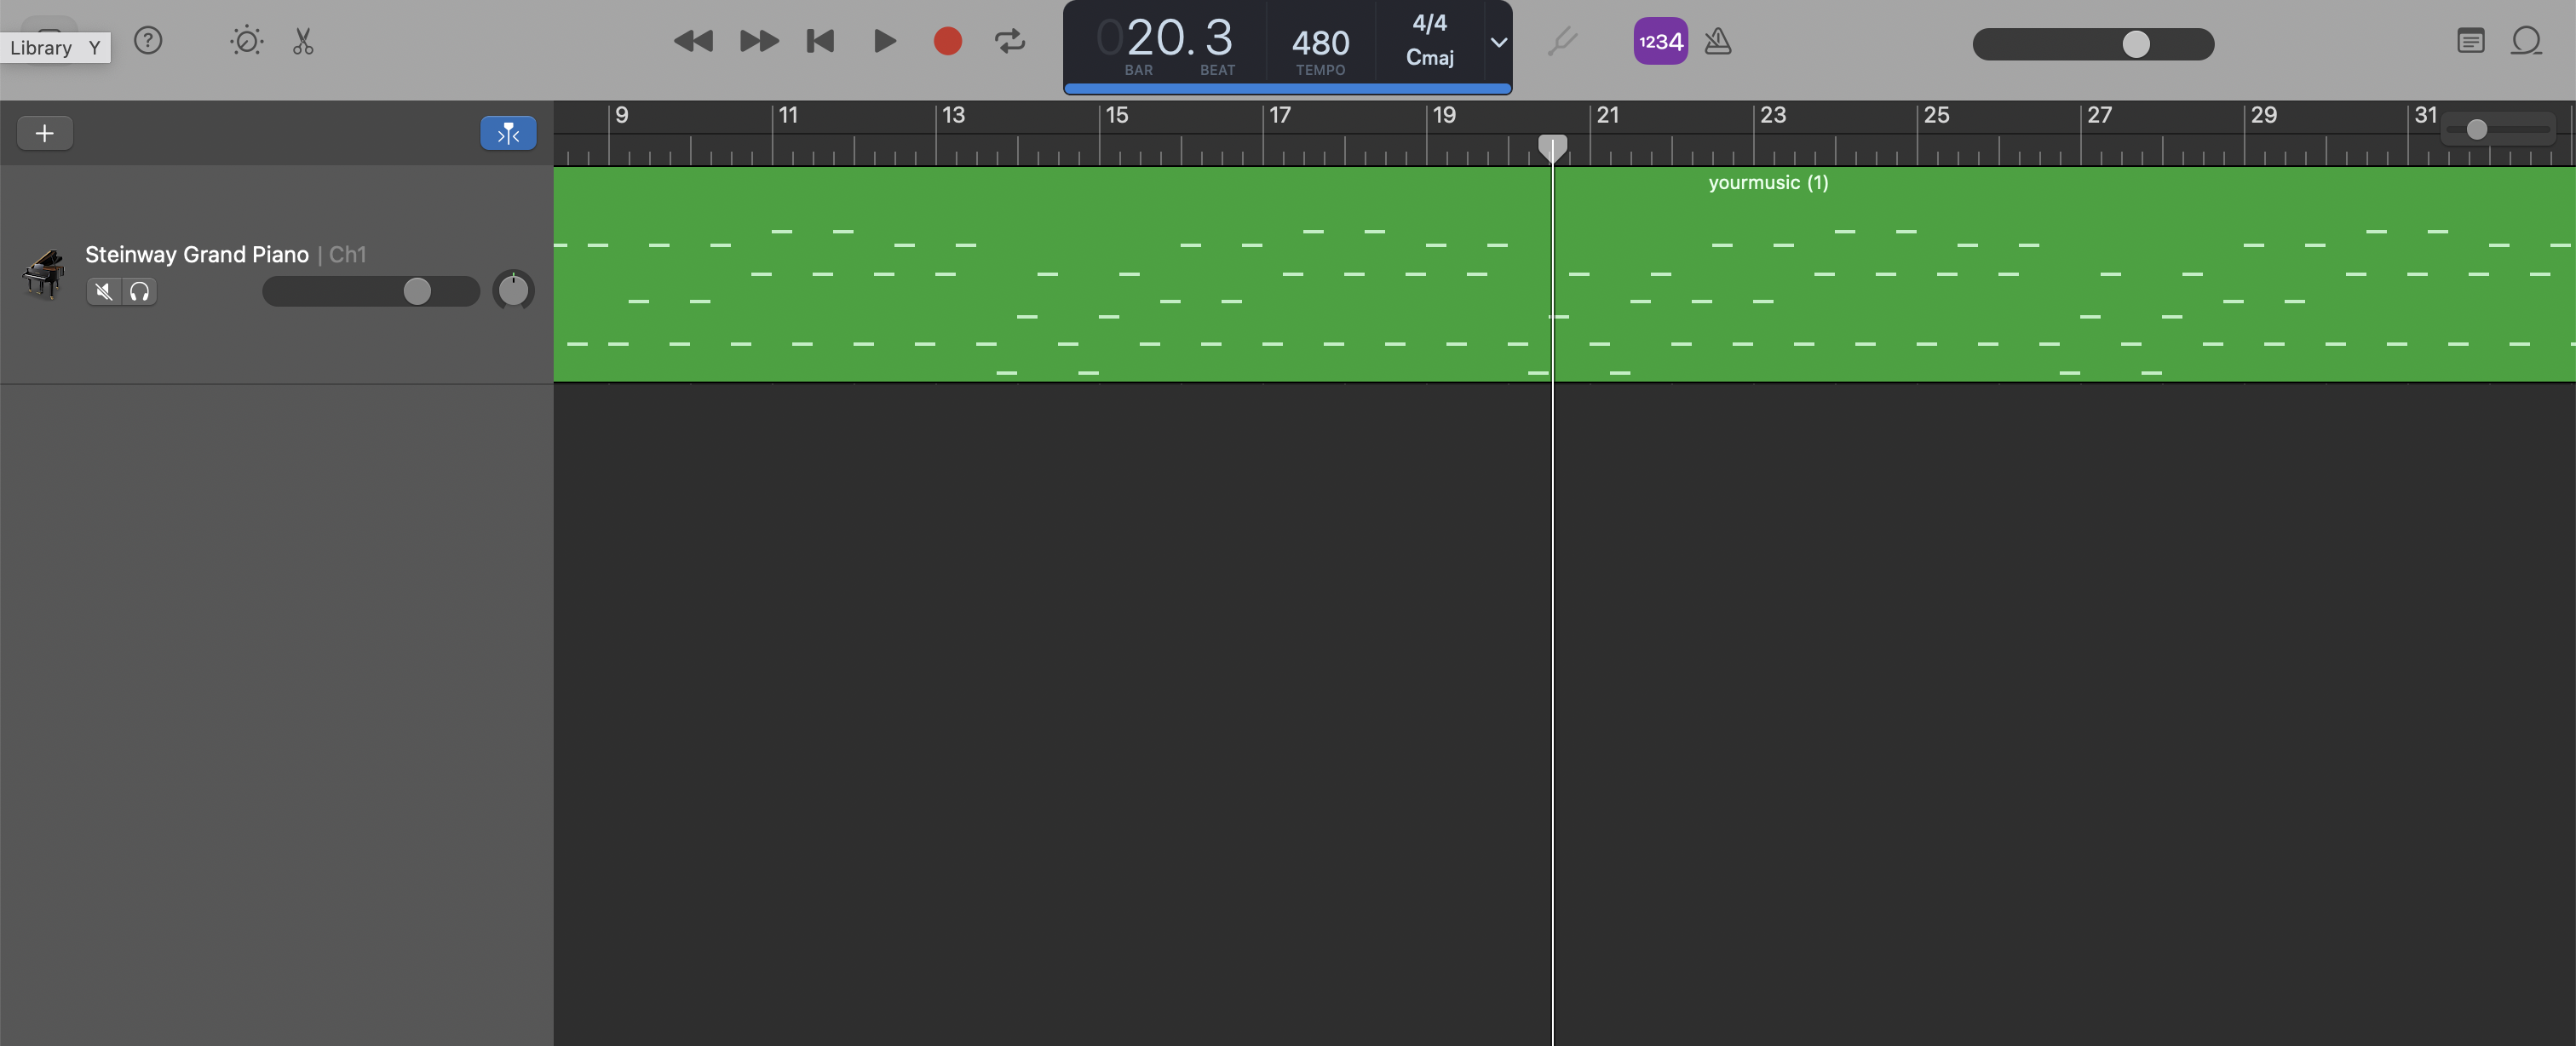

Now that we are able to create audiofiles and link to the data that our webscraper collected, we are ready to organize and present it all in flask!!

## Part 3: Flask and Webapp

Finally, we will combine the elements of Part 1 and Part 2 into our webapp. Our dynamic website contains several different pages that users can interact with. 

First, the user is presented with a login page. They will have an option to create a username and password. This adds an extra level of security to our website but also makes it even more personalized for users to have their own individual account on our site. 

After completing these first steps, our users will be directed to our app home page. From here, they will have the option to pick from one of our amazing Top Ten artists to see a list of tracks that we offer for some fun sing-alongs. 

Finally, once an artist is selected, the user will input a song and then be redircted to the download. In the event that our user ask for a song that does not exist, we have equipped our webapp to output the appropriate error message. 

Included below is the code contained in our app.py file that was used to create our site. 

In [38]:
from chordy_functions_package import app
print(inspect.getsource(app))

from flask import Flask, render_template, request, redirect, url_for, session, send_file
from flask import jsonify
from flask_cors import CORS
import subprocess
import os
import difflib
from dotenv import load_dotenv
from db import Database, User
from midiutil import MIDIFile
from mingus.core import chords
import ast
import pandas as pd
from pychord import Chord

app = Flask(__name__)
app.secret_key = os.urandom(24)

CORS(app, supports_credentials=True)
load_dotenv(".env")
database = Database(os.getenv("DB_PSWD"))

def musicpackage():
    """
    Main function for processing music data.
    Reads chords data from a CSV file, converts chords to notes,
    and generates a MIDI file based on the chord progression.
    """

    NOTES = ['C', 'C#', 'D', 'Eb', 'E', 'F', 'F#', 'G', 'Ab', 'A', 'Bb', 'B']
    OCTAVES = list(range(11))
    NOTES_IN_OCTAVE = len(NOTES)

    errors = {
        'There was an error.'
    }
    def read_csvpath_from_file():
        """
        Reads from the config.t

Each time when you run ``` flask run```, a connection is opened to our unique MongoDB database. The MongoDB atlas connects to regional servers to setup operations. When a user submits a session (that relates to user credentials computation), database computing is called in flask through the db.py helper function and class objects - at run time, we interact with the dynamic database to achieve user login, login sessions, and creating an account. 

On cloud.mongodb.com, this is how our MongoDB deployment and collection looks like in real time:

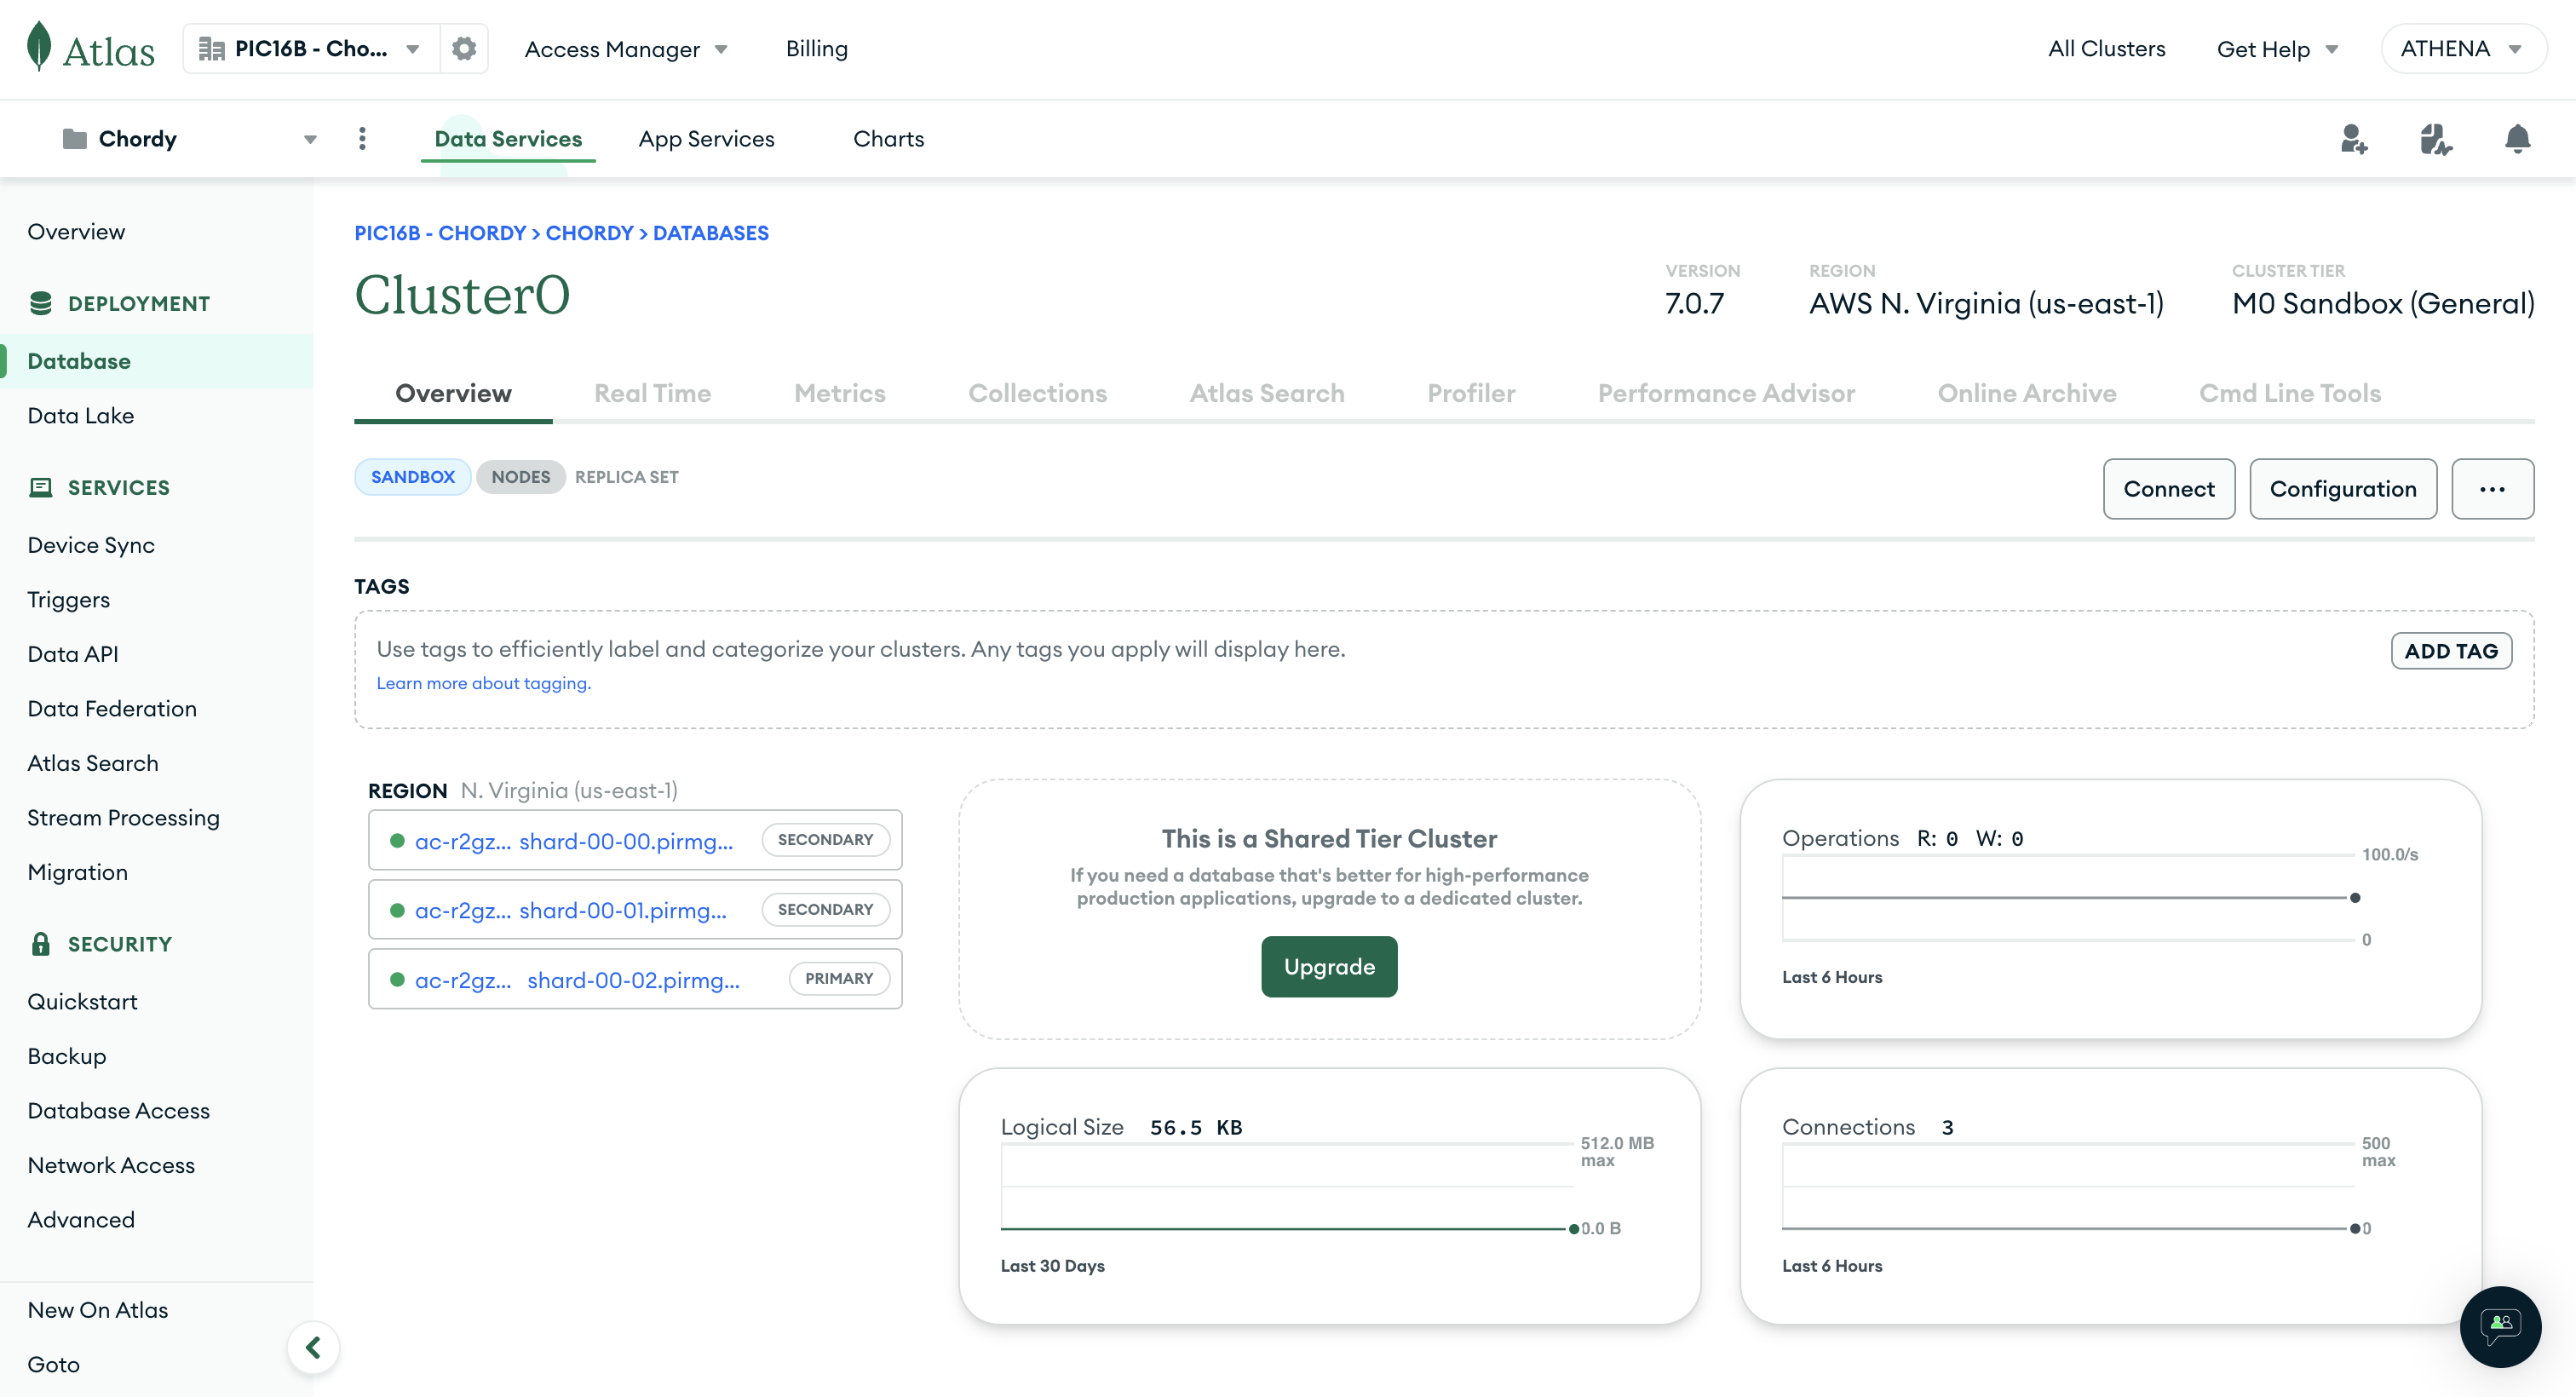

In [2]:
from IPython.display import Image
Image(filename='/Users/athena/Desktop/hw6/mongodb.jpg')

## Conclusion

In this blog post, you learned how to use the project tools behind Chordy. You learned how to run the website on your local device, along with how each of the main components of our website was created. In the future, you can easily import these functions using the chordy_functions_package from our Github repo. And, you can create your own version of Chordy by changing one of the three components in any way you please.

**Ethical ramifications of the project**: One of the ethical remarks of this project is copyright issues. Artists take a lot of time and pride in creating their songs, and though we are only creating simple chord progressions (which cannot be copyrighted), these chord progressions would not mean anything if the artist did not take the time to create this piece of musical art and take the time to make this song famous. Hence, when utilizing this website, make sure to only use it for personal use and not exploit the song artist's art. 

Happy singing! 

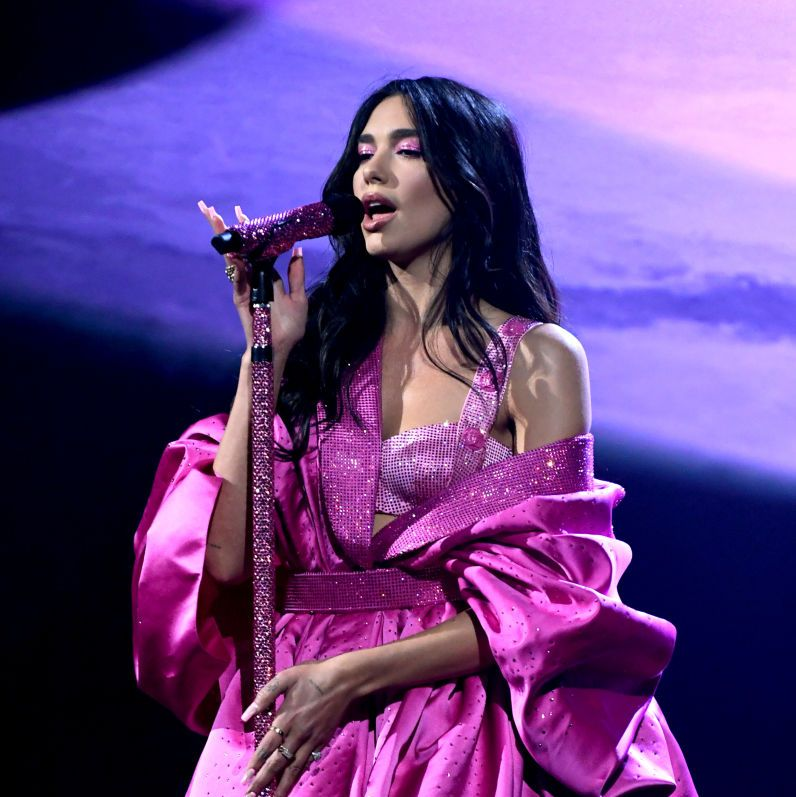

[Image source](https://www.harpersbazaar.com/celebrity/latest/a35833418/dua-lipa-2021-grammy-awards-performance/)